# TODO
[#2](https://github.com/caelum02/LuX-AI-Season-2/issues/2)
Observation to Input

In [4]:
import jux
from jux.env import JuxEnv
from jux.config import JuxBufferConfig
from jux.state import State
from jux.actions import JuxAction

import jax
import jax.numpy as jnp
from jax import jit, vmap, pmap, grad, random, lax
from jax.tree_util import tree_flatten, tree_unflatten, tree_map
from jax import random

from flax import linen as nn

import rich
import matplotlib.pyplot as plt

import utils as ut
import preprocess as pp

from importlib import reload

MAP_SIZE=64

In [2]:
reload(ut)
lux_env, lux_actions = jux.utils.load_replay('../data/52958192.json')
jux_env, state = JuxEnv.from_lux(lux_env, buf_cfg=JuxBufferConfig(MAX_N_UNITS=200))

state, lux_actions = ut.replay_run_early_phase(jux_env, state, lux_actions)
state, lux_actions = ut.replay_run_n_late_game_step(100, jux_env, state, lux_actions)

[Replay Util] Replaying early steps
[Replay Util] Replaying early steps - Done
[Replay Util] Replaying 1/100 steps
[Replay Util] Replaying 2/100 steps
[Replay Util] Replaying 3/100 steps
[Replay Util] Replaying 4/100 steps
[Replay Util] Replaying 5/100 steps
[Replay Util] Replaying 6/100 steps
[Replay Util] Replaying 7/100 steps
[Replay Util] Replaying 8/100 steps
[Replay Util] Replaying 9/100 steps
[Replay Util] Replaying 10/100 steps
[Replay Util] Replaying 11/100 steps
[Replay Util] Replaying 12/100 steps
[Replay Util] Replaying 13/100 steps
[Replay Util] Replaying 14/100 steps
[Replay Util] Replaying 15/100 steps
[Replay Util] Replaying 16/100 steps
[Replay Util] Replaying 17/100 steps
[Replay Util] Replaying 18/100 steps
[Replay Util] Replaying 19/100 steps
[Replay Util] Replaying 20/100 steps
[Replay Util] Replaying 21/100 steps
[Replay Util] Replaying 22/100 steps
[Replay Util] Replaying 23/100 steps
[Replay Util] Replaying 24/100 steps
[Replay Util] Replaying 25/100 steps
[Repl

In [3]:
reload(ut)
lux_env, lux_actions = jux.utils.load_replay('../data/52958192.json')
jux_env, state = JuxEnv.from_lux(lux_env, buf_cfg=JuxBufferConfig(MAX_N_UNITS=1000))

state, lux_actions = ut.replay_run_early_phase(jux_env, state, lux_actions)
state, lux_actions = ut.replay_run_n_late_game_step(750, jux_env, state, lux_actions)

[Replay Util] Replaying early steps
[Replay Util] Replaying early steps - Done
[Replay Util] Replaying 1/750 steps
[Replay Util] Replaying 2/750 steps
[Replay Util] Replaying 3/750 steps
[Replay Util] Replaying 4/750 steps
[Replay Util] Replaying 5/750 steps
[Replay Util] Replaying 6/750 steps
[Replay Util] Replaying 7/750 steps
[Replay Util] Replaying 8/750 steps
[Replay Util] Replaying 9/750 steps
[Replay Util] Replaying 10/750 steps
[Replay Util] Replaying 11/750 steps
[Replay Util] Replaying 12/750 steps
[Replay Util] Replaying 13/750 steps
[Replay Util] Replaying 14/750 steps
[Replay Util] Replaying 15/750 steps
[Replay Util] Replaying 16/750 steps
[Replay Util] Replaying 17/750 steps
[Replay Util] Replaying 18/750 steps
[Replay Util] Replaying 19/750 steps
[Replay Util] Replaying 20/750 steps
[Replay Util] Replaying 21/750 steps
[Replay Util] Replaying 22/750 steps
[Replay Util] Replaying 23/750 steps
[Replay Util] Replaying 24/750 steps
[Replay Util] Replaying 25/750 steps
[Repl

In [3]:
from jux.unit import UnitType 
from jax import vmap, jit
from functools import partial

reload(pp)
unit_feature_map = pp.get_unit_existence(state.unit_mask, state.units.unit_type, state.units.pos)

AttributeError: module 'preprocess' has no attribute 'get_unit_existence'

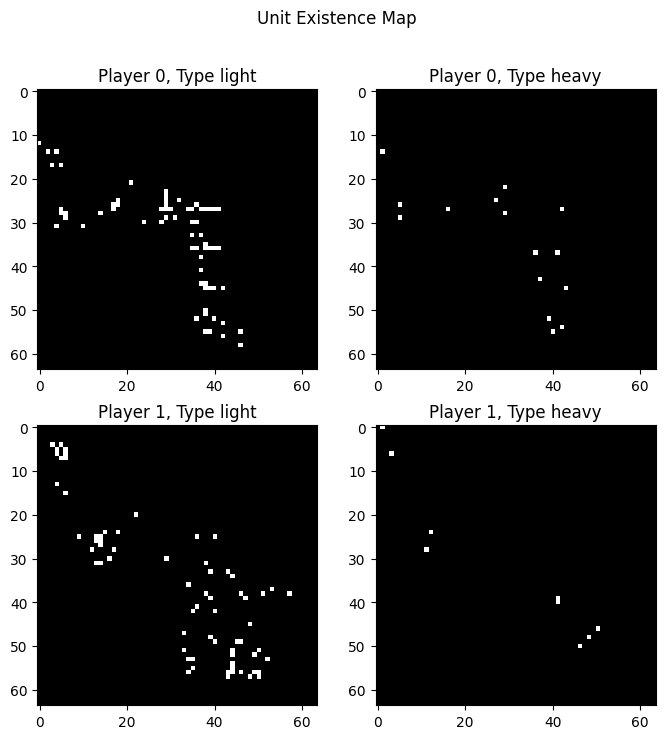

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
unit_type = ["light", "heavy"]
for i in range(2):
    for j in range(2):
        axes[i, j].imshow(unit_existence_map[i, :, :, j], cmap='gray')
        axes[i, j].set_title(f"Player {i}, Type {unit_type[j]}")
fig.suptitle("Unit Existence Map")
plt.show()

In [5]:
lux_act = next(lux_actions)
jux_act = JuxAction.from_lux(state, lux_act)
state, (obs, rwd, dones, infos) = jux_env.step_late_game(state, jux_act)

State(
    env_cfg=EnvConfig(
        max_episode_length=ShapedArray(int32[1], weak_type=True),
        map_size=ShapedArray(int32[1], weak_type=True),
        verbose=ShapedArray(int32[1], weak_type=True),
        validate_action_space=ShapedArray(bool[1]),
        max_transfer_amount=ShapedArray(int32[1], weak_type=True),
        MIN_FACTORIES=ShapedArray(int32[1], weak_type=True),
        MAX_FACTORIES=ShapedArray(int32[1], weak_type=True),
        CYCLE_LENGTH=ShapedArray(int32[1], weak_type=True),
        DAY_LENGTH=ShapedArray(int32[1], weak_type=True),
        UNIT_ACTION_QUEUE_SIZE=ShapedArray(int32[1], weak_type=True),
        MAX_RUBBLE=ShapedArray(int32[1], weak_type=True),
        FACTORY_RUBBLE_AFTER_DESTRUCTION=ShapedArray(int32[1], weak_type=True),
        INIT_WATER_METAL_PER_FACTORY=ShapedArray(int32[1], weak_type=True),
        INIT_POWER_PER_FACTORY=ShapedArray(int32[1], weak_type=True),
        MIN_LICHEN_TO_SPREAD=ShapedArray(int32[1], weak_type=True),
        LICHEN_LOST_WITHOUT_WATER=ShapedArray(int32[1], weak_type=True),
        LICHEN_GAINED_WITH_WATER=ShapedArray(int32[1], weak_type=True),
        MAX_LICHEN_PER_TILE=ShapedArray(int32[1], weak_type=True),
        POWER_PER_CONNECTED_LICHEN_TILE=ShapedArray(int32[1], weak_type=True),
        LICHEN_WATERING_COST_FACTOR=ShapedArray(int32[1], weak_type=True),
        BIDDING_SYSTEM=ShapedArray(bool[1]),
        FACTORY_PROCESSING_RATE_WATER=ShapedArray(int32[1], weak_type=True),
        ICE_WATER_RATIO=ShapedArray(int32[1], weak_type=True),
        FACTORY_PROCESSING_RATE_METAL=ShapedArray(int32[1], weak_type=True),
        ORE_METAL_RATIO=ShapedArray(int32[1], weak_type=True),
        FACTORY_CHARGE=ShapedArray(int32[1], weak_type=True),
        FACTORY_WATER_CONSUMPTION=ShapedArray(int32[1], weak_type=True),
        POWER_LOSS_FACTOR=ShapedArray(float32[1], weak_type=True),
        ROBOTS=(
            UnitConfig(
                METAL_COST=ShapedArray(int32[1], weak_type=True),
                POWER_COST=ShapedArray(int32[1], weak_type=True),
                CARGO_SPACE=ShapedArray(int32[1], weak_type=True),
                BATTERY_CAPACITY=ShapedArray(int32[1], weak_type=True),
                CHARGE=ShapedArray(int32[1], weak_type=True),
                INIT_POWER=ShapedArray(int32[1], weak_type=True),
                MOVE_COST=ShapedArray(int32[1], weak_type=True),
                RUBBLE_MOVEMENT_COST=ShapedArray(float32[1], weak_type=True),
                DIG_COST=ShapedArray(int32[1], weak_type=True),
                DIG_RUBBLE_REMOVED=ShapedArray(int32[1], weak_type=True),
                DIG_RESOURCE_GAIN=ShapedArray(int32[1], weak_type=True),
                DIG_LICHEN_REMOVED=ShapedArray(int32[1], weak_type=True),
                SELF_DESTRUCT_COST=ShapedArray(int32[1], weak_type=True),
                RUBBLE_AFTER_DESTRUCTION=ShapedArray(int32[1], weak_type=True),
                ACTION_QUEUE_POWER_COST=ShapedArray(int32[1], weak_type=True)
            ),
            UnitConfig(
                METAL_COST=ShapedArray(int32[1], weak_type=True),
                POWER_COST=ShapedArray(int32[1], weak_type=True),
                CARGO_SPACE=ShapedArray(int32[1], weak_type=True),
                BATTERY_CAPACITY=ShapedArray(int32[1], weak_type=True),
                CHARGE=ShapedArray(int32[1], weak_type=True),
                INIT_POWER=ShapedArray(int32[1], weak_type=True),
                MOVE_COST=ShapedArray(int32[1], weak_type=True),
                RUBBLE_MOVEMENT_COST=ShapedArray(int32[1], weak_type=True),
                DIG_COST=ShapedArray(int32[1], weak_type=True),
                DIG_RUBBLE_REMOVED=ShapedArray(int32[1], weak_type=True),
                DIG_RESOURCE_GAIN=ShapedArray(int32[1], weak_type=True),
                DIG_LICHEN_REMOVED=ShapedArray(int32[1], weak_type=True),
                SELF_DESTRUCT_COST=ShapedArray(int32[1], weak_type=True),
                RUBBLE_AFTER_DESTRUCTION=ShapedArray(int32[1], weak_type=True),
 

In [4]:
reload(pp)
unit_feature = pp.get_unit_feature(state.unit_mask, state.units.unit_type, state.units.cargo.stock, state.units.power, state.units.pos)

TypeError: get_unit_feature() takes 1 positional argument but 5 were given

In [35]:
# Without for loop
reload(pp)
pp.get_unit_feature(state.unit_mask, state.units.unit_type, state.units.cargo.stock, state.units.power, state.units.pos)

%timeit pp.get_unit_feature(state.unit_mask, state.units.unit_type, state.units.cargo.stock, state.units.power, state.units.pos)

1.44 ms ± 347 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [40]:
# Without for loop (x, y precalculated)
reload(pp)
pp.get_unit_feature(state.unit_mask, state.units.unit_type, state.units.cargo.stock, state.units.power, state.units.pos.x, state.units.pos.y)

%timeit pp.get_unit_feature(state.unit_mask, state.units.unit_type, state.units.cargo.stock, state.units.power, state.units.pos.x, state.units.pos.y)

2.44 ms ± 506 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [59]:
# With for loop (static)
reload(pp)
pp.get_unit_feature(state.unit_mask, state.units.unit_type, state.units.cargo.stock, state.units.power, state.units.pos)

%timeit pp.get_unit_feature(state.unit_mask, state.units.unit_type, state.units.cargo.stock, state.units.power, state.units.pos)

1.17 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [60]:
# With for loop (no vmap on feature dim)
reload(pp)
pp.get_unit_feature(state.unit_mask, state.units.unit_type, state.units.cargo.stock, state.units.power, state.units.pos)

%timeit pp.get_unit_feature(state.unit_mask, state.units.unit_type, state.units.cargo.stock, state.units.power, state.units.pos)

1.05 ms ± 53.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [4]:
# pass state as whole
reload(pp)
pp.get_unit_feature(state)

%timeit pp.get_unit_feature(state)

58.6 µs ± 5.65 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [65]:
# jit-less
reload(pp)
pp.get_unit_feature(state.unit_mask, state.units.unit_type, state.units.cargo.stock, state.units.power, state.units.pos)

%timeit pp.get_unit_feature(state.unit_mask, state.units.unit_type, state.units.cargo.stock, state.units.power, state.units.pos)

93.6 ms ± 4.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
reload(pp)
pp.get_unit_feature(state).shape

(64, 64, 24)

In [8]:
reload(pp)
pp.get_factory_feature(state).shape

(64, 64, 16)

In [9]:
reload(pp)
pp.get_board_feature(state).shape

(64, 64, 4)

In [10]:
reload(pp)
pp.get_global_feature(state).shape

(73,)

In [16]:
reload(pp)
pp.get_feature(state).shape

(64, 64, 117)

NameError: name 'unit_feature' is not defined

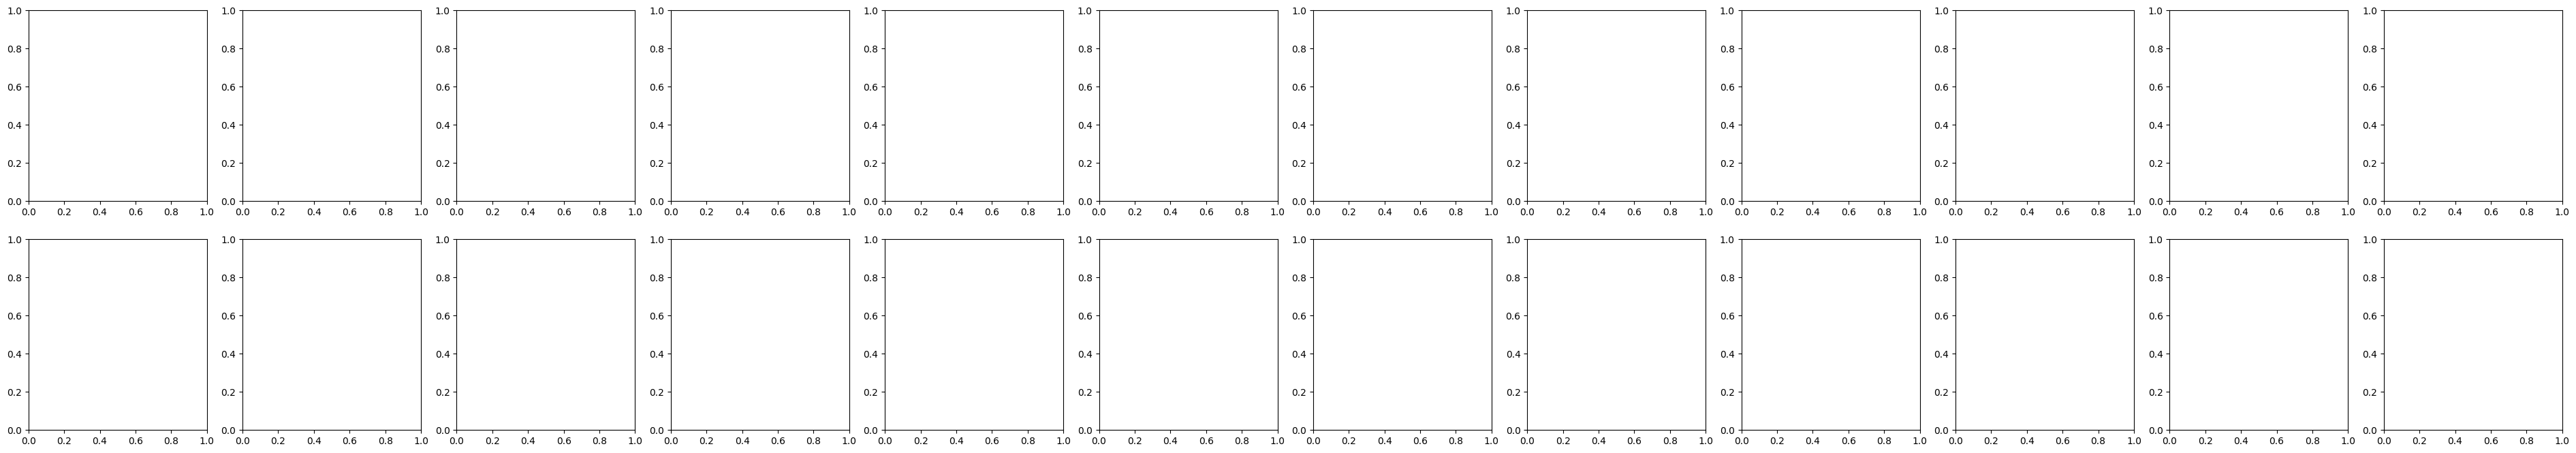

In [11]:
fig, axes = plt.subplots(2, 12, figsize=(48, 8))
features = ['light_existence', 'heavy_existence', 'ice', 'ore', 'water', 'metal', 'power', 'ice_left', 'ore_left', 'water_left', 'metal_left', 'powerleft']
for i in range(2):
    for j in range(12):
        axes[i, j].imshow(unit_feature[i, :, :, j], cmap='gray')
        axes[i, j].set_title(f"Player {i}, {features[j]}")
fig.suptitle("Unit Features")
plt.show()

In [62]:
a = jnp.arange(0, 10*10*5).reshape(10, 10, 5)
b = jnp.array([
    [0, 1],
    [2, 5],
    [2, 7],
    [9, 6],
    [32767, 32767],
    [32767, 32767],
    [32767, 32767],
    [32767, 32767],
    [32767, 32767],
    [32767, 32767],
], dtype=jnp.int16)
a.at[b[0,0], [0,1]].set(jnp.array([
    [-1, -2, -3, -4, -5], [-6, -7, -8, -9, -10],
]))

Array([[[ -1,  -2,  -3,  -4,  -5],
        [ -6,  -7,  -8,  -9, -10],
        [ 10,  11,  12,  13,  14],
        [ 15,  16,  17,  18,  19],
        [ 20,  21,  22,  23,  24],
        [ 25,  26,  27,  28,  29],
        [ 30,  31,  32,  33,  34],
        [ 35,  36,  37,  38,  39],
        [ 40,  41,  42,  43,  44],
        [ 45,  46,  47,  48,  49]],

       [[ 50,  51,  52,  53,  54],
        [ 55,  56,  57,  58,  59],
        [ 60,  61,  62,  63,  64],
        [ 65,  66,  67,  68,  69],
        [ 70,  71,  72,  73,  74],
        [ 75,  76,  77,  78,  79],
        [ 80,  81,  82,  83,  84],
        [ 85,  86,  87,  88,  89],
        [ 90,  91,  92,  93,  94],
        [ 95,  96,  97,  98,  99]],

       [[100, 101, 102, 103, 104],
        [105, 106, 107, 108, 109],
        [110, 111, 112, 113, 114],
        [115, 116, 117, 118, 119],
        [120, 121, 122, 123, 124],
        [125, 126, 127, 128, 129],
        [130, 131, 132, 133, 134],
        [135, 136, 137, 138, 139],
        [140, 14

In [22]:
unit_map.aval

ShapedArray(float32[64,64,4])

#### Guarantees
```python
observations['player_0'] == observations['player_1'] == state
dones['player_0'] == dones['player_1']
infos['player_0'] == infos['player_1'] == {}
```

## Understanding the `State`

`State` object is a nested `NamedTuple`, with all leaves being `jax.numpy.ndarray`. It has following fields. 

In [14]:
state._fields

('env_cfg',
 'seed',
 'rng_state',
 'env_steps',
 'board',
 'units',
 'unit_id2idx',
 'n_units',
 'factories',
 'factory_id2idx',
 'n_factories',
 'teams',
 'global_id',
 'place_first')

### Board Information

Information about the board, including rubble, ice, ore, and lichen, are stored in `state.board`.

In [13]:
import jux.tree_util
import rich
rich.print(jux.tree_util.map_to_aval(state.board))

Board(
    seed=ShapedArray(int32[]),
    factories_per_team=ShapedArray(int8[]),
    map=GameMap(
        rubble=ShapedArray(int8[48,48]),
        ice=ShapedArray(bool[48,48]),
        ore=ShapedArray(bool[48,48]),
        symmetry=ShapedArray(int8[])
    ),
    lichen=ShapedArray(int32[48,48]),
    lichen_strains=ShapedArray(int8[48,48]),
    units_map=ShapedArray(int16[48,48]),
    factory_map=ShapedArray(int8[48,48]),
    factory_occupancy_map=ShapedArray(int8[48,48]),
    factory_pos=ShapedArray(int8[22,2])
)

### Factory Information

All information about factories, including their position, cargo, and power, are stored in `state.factories`. `state.n_factories` indicates the number of factories each player has. Because we have just reset the environment, both players have 0 factory. The leaves of `state.factories` have shapes shown as below. 

In [14]:
previous_state = state
state, lux_actions = ut.replay_run_n_late_game_step(1, jux_env, state, lux_actions)

[Replay Util] Replaying 1/1 steps


In [10]:
reload(pp)
factory_feature = pp.get_factory_feature(state, previous_state.factories.power)

In [11]:
factory_feature.shape

(2, 64, 64, 7)

In [ ]:
fig, axes = plt.subplots(2, 7, figsize=(28, 8))
features = ['existence', 'ice', 'ore', 'water', 'metal', 'power', 'previous_power']
for i in range(2):
    for j in range(7):
        axes[i, j].imshow(factory_feature[i, :, :, j], cmap='gray')
        axes[i, j].set_title(f"Player {i}, {features[j]}")
fig.suptitle("Factory Features")
plt.show()


In [5]:
from jux.env import JuxEnvBatch

jux_env_batch = JuxEnvBatch(buf_cfg=JuxBufferConfig(MAX_N_UNITS=200))

In [6]:
import jax.numpy as jnp

batch_size = 3
seeds = jnp.arange(batch_size)

states = jux_env_batch.reset(seeds)

In [7]:
# bid step
bid = jnp.zeros((batch_size, 2), dtype=jnp.int32)
faction = jnp.zeros((batch_size, 2), dtype=jnp.int8)

states, (observations, rewards, dones, infos) = jux_env_batch.step_bid(states, bid, faction)

print(f"bid: {bid.aval}")
print(f"faction: {faction.aval}")

bid: ShapedArray(int32[3,2])
faction: ShapedArray(int8[3,2])


In [8]:
key = jax.random.PRNGKey(0)
water = jnp.ones((batch_size, 2), dtype=jnp.int32) * 150
metal = jnp.ones((batch_size, 2), dtype=jnp.int32) * 150

# factory placement step
factories_per_team = states.board.factories_per_team[0]
for i in range(factories_per_team * 2):
    # random spawn position
    key, subkey = jax.random.split(key)
    spawn = jax.random.randint(subkey, (batch_size, 2, 2), 0, jux_env_batch.env_cfg.map_size, dtype=jnp.int8)
    states, (observations, rewards, dones, infos) = jux_env_batch.step_factory_placement(states, spawn, water, metal)

print(f"spawn: {spawn.aval}")
print(f"water: {water.aval}")
print(f"metal: {metal.aval}")

spawn: ShapedArray(int8[3,2,2])
water: ShapedArray(int32[3,2])
metal: ShapedArray(int32[3,2])


In [39]:
from rich import print as rprint
rprint(tree_map(lambda t: t.aval, states))

State(
    env_cfg=EnvConfig(
        max_episode_length=ShapedArray(int32[3], weak_type=True),
        map_size=ShapedArray(int32[3], weak_type=True),
        verbose=ShapedArray(int32[3], weak_type=True),
        validate_action_space=ShapedArray(bool[3]),
        max_transfer_amount=ShapedArray(int32[3], weak_type=True),
        MIN_FACTORIES=ShapedArray(int32[3], weak_type=True),
        MAX_FACTORIES=ShapedArray(int32[3], weak_type=True),
        CYCLE_LENGTH=ShapedArray(int32[3], weak_type=True),
        DAY_LENGTH=ShapedArray(int32[3], weak_type=True),
        UNIT_ACTION_QUEUE_SIZE=ShapedArray(int32[3], weak_type=True),
        MAX_RUBBLE=ShapedArray(int32[3], weak_type=True),
        FACTORY_RUBBLE_AFTER_DESTRUCTION=ShapedArray(int32[3], weak_type=True),
        INIT_WATER_METAL_PER_FACTORY=ShapedArray(int32[3], weak_type=True),
        INIT_POWER_PER_FACTORY=ShapedArray(int32[3], weak_type=True),
        MIN_LICHEN_TO_SPREAD=ShapedArray(int32[3], weak_type=True),
        LICHEN_LOST_WITHOUT_WATER=ShapedArray(int32[3], weak_type=True),
        LICHEN_GAINED_WITH_WATER=ShapedArray(int32[3], weak_type=True),
        MAX_LICHEN_PER_TILE=ShapedArray(int32[3], weak_type=True),
        POWER_PER_CONNECTED_LICHEN_TILE=ShapedArray(int32[3], weak_type=True),
        LICHEN_WATERING_COST_FACTOR=ShapedArray(int32[3], weak_type=True),
        BIDDING_SYSTEM=ShapedArray(bool[3]),
        FACTORY_PROCESSING_RATE_WATER=ShapedArray(int32[3], weak_type=True),
        ICE_WATER_RATIO=ShapedArray(int32[3], weak_type=True),
        FACTORY_PROCESSING_RATE_METAL=ShapedArray(int32[3], weak_type=True),
        ORE_METAL_RATIO=ShapedArray(int32[3], weak_type=True),
        FACTORY_CHARGE=ShapedArray(int32[3], weak_type=True),
        FACTORY_WATER_CONSUMPTION=ShapedArray(int32[3], weak_type=True),
        POWER_LOSS_FACTOR=ShapedArray(float32[3], weak_type=True),
        ROBOTS=(
            UnitConfig(
                METAL_COST=ShapedArray(int32[3], weak_type=True),
                POWER_COST=ShapedArray(int32[3], weak_type=True),
                CARGO_SPACE=ShapedArray(int32[3], weak_type=True),
                BATTERY_CAPACITY=ShapedArray(int32[3], weak_type=True),
                CHARGE=ShapedArray(int32[3], weak_type=True),
                INIT_POWER=ShapedArray(int32[3], weak_type=True),
                MOVE_COST=ShapedArray(int32[3], weak_type=True),
                RUBBLE_MOVEMENT_COST=ShapedArray(float32[3], weak_type=True),
                DIG_COST=ShapedArray(int32[3], weak_type=True),
                DIG_RUBBLE_REMOVED=ShapedArray(int32[3], weak_type=True),
                DIG_RESOURCE_GAIN=ShapedArray(int32[3], weak_type=True),
                DIG_LICHEN_REMOVED=ShapedArray(int32[3], weak_type=True),
                SELF_DESTRUCT_COST=ShapedArray(int32[3], weak_type=True),
                RUBBLE_AFTER_DESTRUCTION=ShapedArray(int32[3], weak_type=True),
                ACTION_QUEUE_POWER_COST=ShapedArray(int32[3], weak_type=True)
            ),
            UnitConfig(
                METAL_COST=ShapedArray(int32[3], weak_type=True),
                POWER_COST=ShapedArray(int32[3], weak_type=True),
                CARGO_SPACE=ShapedArray(int32[3], weak_type=True),
                BATTERY_CAPACITY=ShapedArray(int32[3], weak_type=True),
                CHARGE=ShapedArray(int32[3], weak_type=True),
                INIT_POWER=ShapedArray(int32[3], weak_type=True),
                MOVE_COST=ShapedArray(int32[3], weak_type=True),
                RUBBLE_MOVEMENT_COST=ShapedArray(float32[3], weak_type=True),
                DIG_COST=ShapedArray(int32[3], weak_type=True),
                DIG_RUBBLE_REMOVED=ShapedArray(int32[3], weak_type=True),
                DIG_RESOURCE_GAIN=ShapedArray(int32[3], weak_type=True),
                DIG_LICHEN_REMOVED=ShapedArray(int32[3], weak_type=True),
                SELF_DESTRUCT_COST=ShapedArray(int32[3], weak_type=True),
                RUBBLE_AFTER_DESTRUCTION=ShapedArray(int32[3], weak_type=True),

In [6]:
reload(ut)
state = tree_map(lambda t: t[0], states)
flipped_states = ut.flip_states(states)
print(flipped_states.factories.pos.pos[0][:, :6])
print(states.factories.pos.pos[0][:, :6])

[[[ 48  50]
  [ 45  46]
  [ 45  55]
  [ 44  61]
  [ 32  22]
  [127 127]]

 [[ 16  38]
  [  7  20]
  [  2  50]
  [ 41   6]
  [ 10  29]
  [127 127]]]
[[[ 16  38]
  [  7  20]
  [  2  50]
  [ 41   6]
  [ 10  29]
  [127 127]]

 [[ 48  50]
  [ 45  46]
  [ 45  55]
  [ 44  61]
  [ 32  22]
  [127 127]]]


In [7]:
states.board.factories_per_team.shape

(2,)

In [8]:
import preprocess as pp


In [7]:
reload(ut)
reload(pp)
print(pp.get_global_feature(states).shape)
# pp.get_unit_feature(tree_map(lambda t: t[0], states)).shape

(3, 73)


In [9]:
global_feature = pp.get_global_feature(states)
global_feature

Array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0.]], 

In [11]:
a = jnp.arange(2*5).reshape(2, 5)
a

Array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]], dtype=int32)

In [12]:
a.at[:, [-2, -1]].set(a[:, [-1, -2]])

Array([[0, 1, 2, 4, 3],
       [5, 6, 7, 9, 8]], dtype=int32)

In [14]:
reload(pp)
feature_1, feature_2 = pp.get_feature_teams(states)

In [33]:
feature_1.local_feature[0]

Array([[[ 0.,  0.,  0., ..., 83.,  0.,  0.],
        [ 0.,  0.,  0., ..., 80.,  0.,  0.],
        [ 0.,  0.,  0., ..., 77.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 77.,  0.,  0.],
        [ 0.,  0.,  0., ..., 80.,  0.,  0.],
        [ 0.,  0.,  0., ..., 83.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 82.,  0.,  0.],
        [ 0.,  0.,  0., ..., 79.,  0.,  0.],
        [ 0.,  0.,  0., ..., 76.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 76.,  0.,  0.],
        [ 0.,  0.,  0., ..., 79.,  0.,  0.],
        [ 0.,  0.,  0., ..., 82.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 80.,  0.,  0.],
        [ 0.,  0.,  0., ..., 77.,  0.,  0.],
        [ 0.,  0.,  0., ..., 74.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 14.,  0.,  0.],
        [ 0.,  0.,  0., ..., 77.,  0.,  0.],
        [ 0.,  0.,  0., ..., 80.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ..., 71.,  0.,  0.],
        [ 0.,  0.,  0., ..., 71.,  0.,  0.],
        [ 0.,  0.,  0., ..., 14.,  0.,  0.

In [45]:
import numpy as np
set(np.array(feature_2.local_feature[0].nonzero()[2]))

{24, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 41, 42, 43}

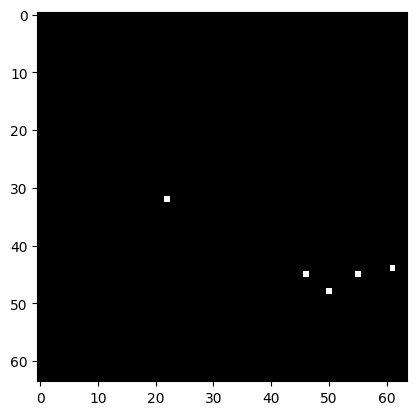

In [55]:
plt.imshow(feature_1.local_feature[0, ..., 32], cmap='gray')

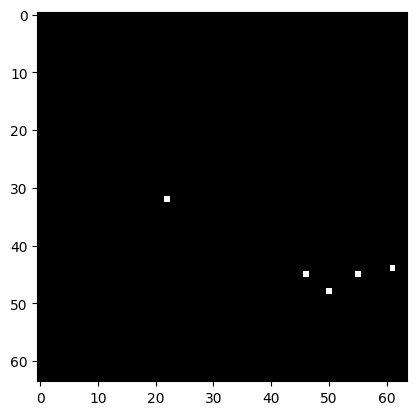

In [54]:
plt.imshow(feature_2.local_feature[0, ..., 27], cmap='gray')

In [20]:
states.factories.cargo.stock.shape

(3, 2, 11, 4)

Array([[[False, False, False, False, False, False, False, False, False,
         False, False],
        [ True,  True,  True,  True,  True, False, False, False, False,
         False, False]],

       [[False, False, False, False, False, False, False, False, False,
         False, False],
        [ True,  True,  True,  True, False, False, False, False, False,
         False, False]],

       [[False, False, False, False, False, False, False, False, False,
         False, False],
        [ True,  True,  True,  True,  True, False, False, False, False,
         False, False]]], dtype=bool)

Array([150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150], dtype=int32)

In [42]:
env_state = states
env_state = env_state._replace(
                    factories=env_state.factories._replace(
                        cargo=env_state.factories.cargo._replace(
                            stock=env_state.factories.cargo.stock.at[:, 1, :, 2].set(env_state.factory_mask[:, 1, :] * 50))))
env_state.factories.cargo.stock

Array([[[[  0,   0, 150, 150],
         [  0,   0, 150, 150],
         [  0,   0, 150, 150],
         [  0,   0, 150, 150],
         [  0,   0, 150, 150],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0]],

        [[  0,   0, 150,  50],
         [  0,   0, 150,  50],
         [  0,   0, 150,  50],
         [  0,   0, 150,  50],
         [  0,   0, 150,  50],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0]]],


       [[[  0,   0, 150, 150],
         [  0,   0, 150, 150],
         [  0,   0, 150, 150],
         [  0,   0, 150, 150],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
  

In [10]:
reload(pp)
pp.get_unit_feature(states).shape
# pp.get_unit_feature(tree_map(lambda t: t[0], states)).shape

(2, 64, 64, 24)

In [11]:
reload(pp)
pp.get_board_feature(states).shape
#pp.get_board_feature(tree_map(lambda t: t[0], states)).shape

(2, 64, 64, 4)

In [12]:
reload(pp)
pp.get_factory_feature(states).shape
# pp.get_factory_feature(tree_map(lambda t: t[0], states)).shape

(2, 64, 64, 16)

In [13]:
reload(pp)
tree_map(lambda t: t.shape, pp.get_feature(states))

ObsSpace(local_feature=(2, 64, 64, 44), global_feature=(2, 73))

In [71]:
%timeit pp.get_feature(states)

5.01 ms ± 503 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [50]:
import models
from jax.random import PRNGKey
reload(models)
model = models.NaiveActorCritic(tree_map(lambda t: t[0], states.env_cfg), jux_env_batch.buf_cfg)
features = pp.get_feature(states)
params = model.init(PRNGKey(0), features)
action, value = model.apply(params, features)
print(value)

[[-9.36902  ]
 [-2.8293552]]
